In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Using warnings lib to supress the clutter
import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing and Exploratory Data Analysis

In this section, we will be performing the data preprocessing step of our analysis. This includes checking for null values, cleaning up and removing variables that aren't useful to our analysis, and a statistical analysis of our data. We will also be visualizing our data with boxplots to check for outliers and distribution plots to understand the data's distribution. More specifically, we will be looking at the variables with a higher number of outliers than the other variables. We may also try removing outliers from our data to see if it helps our findings.

### Taking a look at the data and cleaning it up

In [4]:
# Read in the data
rawDF = pd.read_csv("Cancer_Data.csv")

# Get a quick understanding of our data
rawDF.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
# Take a peak at the data
rawDF.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
# Check for NA values in the dataset
for col in rawDF:
    naCount = rawDF[col].isna().sum()
    print(f"The number of NA values in the {col} col is {naCount}")

The number of NA values in the id col is 0
The number of NA values in the diagnosis col is 0
The number of NA values in the radius_mean col is 0
The number of NA values in the texture_mean col is 0
The number of NA values in the perimeter_mean col is 0
The number of NA values in the area_mean col is 0
The number of NA values in the smoothness_mean col is 0
The number of NA values in the compactness_mean col is 0
The number of NA values in the concavity_mean col is 0
The number of NA values in the concave points_mean col is 0
The number of NA values in the symmetry_mean col is 0
The number of NA values in the fractal_dimension_mean col is 0
The number of NA values in the radius_se col is 0
The number of NA values in the texture_se col is 0
The number of NA values in the perimeter_se col is 0
The number of NA values in the area_se col is 0
The number of NA values in the smoothness_se col is 0
The number of NA values in the compactness_se col is 0
The number of NA values in the concavity_

In [7]:
# As we can see there is a unamed column that contains only null values lets remove it along with the 'id' column since we don't need these
rawDF = rawDF.drop(["Unnamed: 32","id"], axis = 1)

# While we're modifiying variables though, let's go ahead and make the diagnosis numerical
rawDF.diagnosis = [1 if each == "M" else 0 for each in rawDF.diagnosis]

In [8]:
# Separate the categorical variables and the numeric variables into separate lists to analyze
categorical = rawDF.select_dtypes(include=['object', 'category']).columns.tolist()
numeric = rawDF.select_dtypes(include=['int64', 'float64']).columns.tolist()

### Correlation heatmap

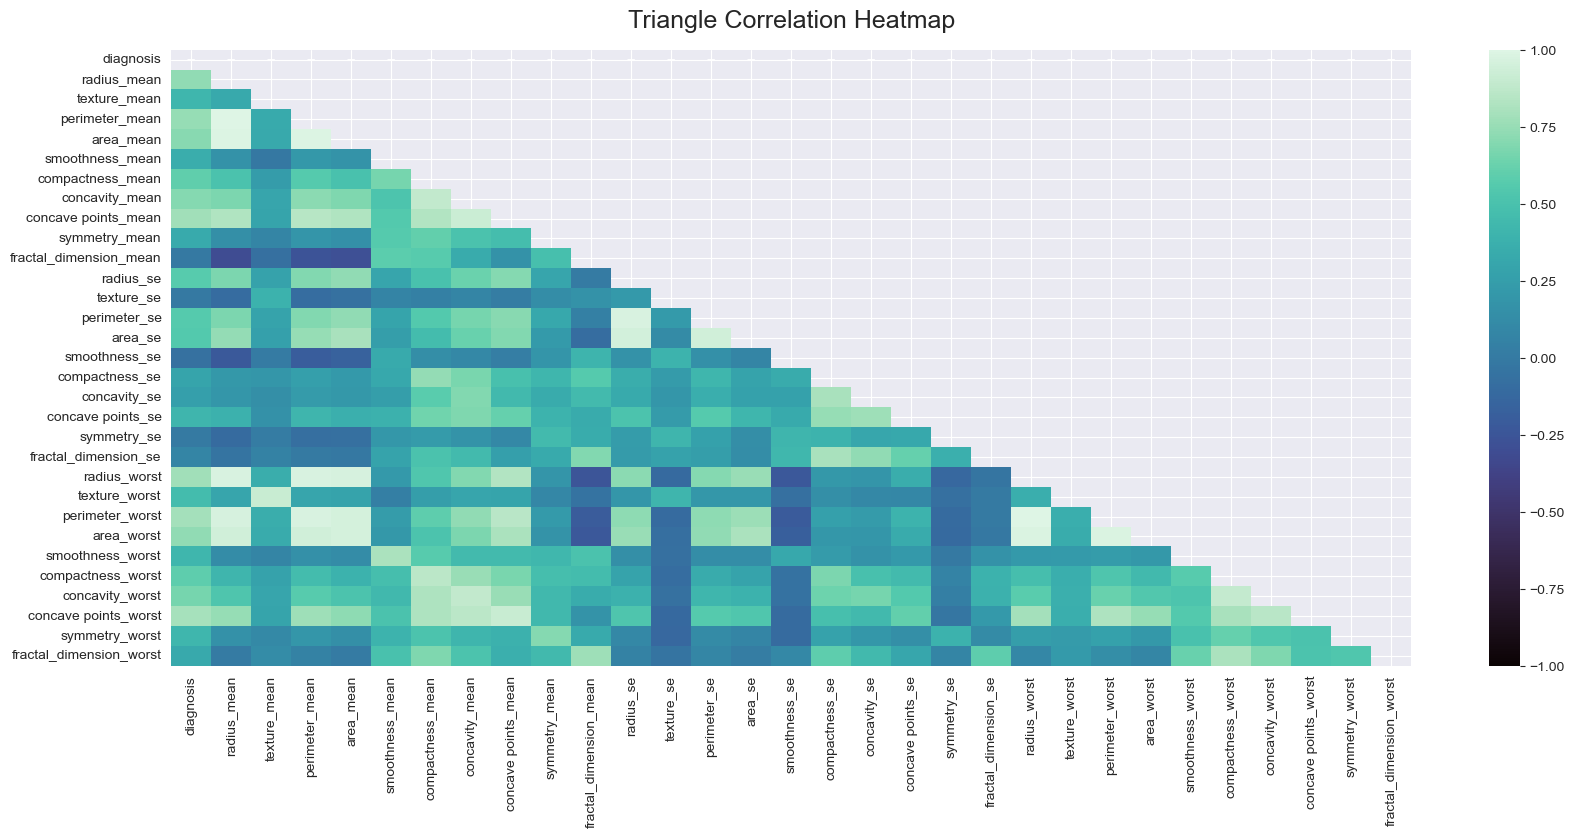

In [40]:
# Correlation heatmap
plt.figure(figsize=(20, 8))
mask = np.triu(np.ones_like(rawDF.corr(), dtype=bool))
cmap = sns.color_palette("mako", as_cmap=True)
heatmap = sns.heatmap(rawDF.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap=cmap)

heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.show() 

### Looking at outliers

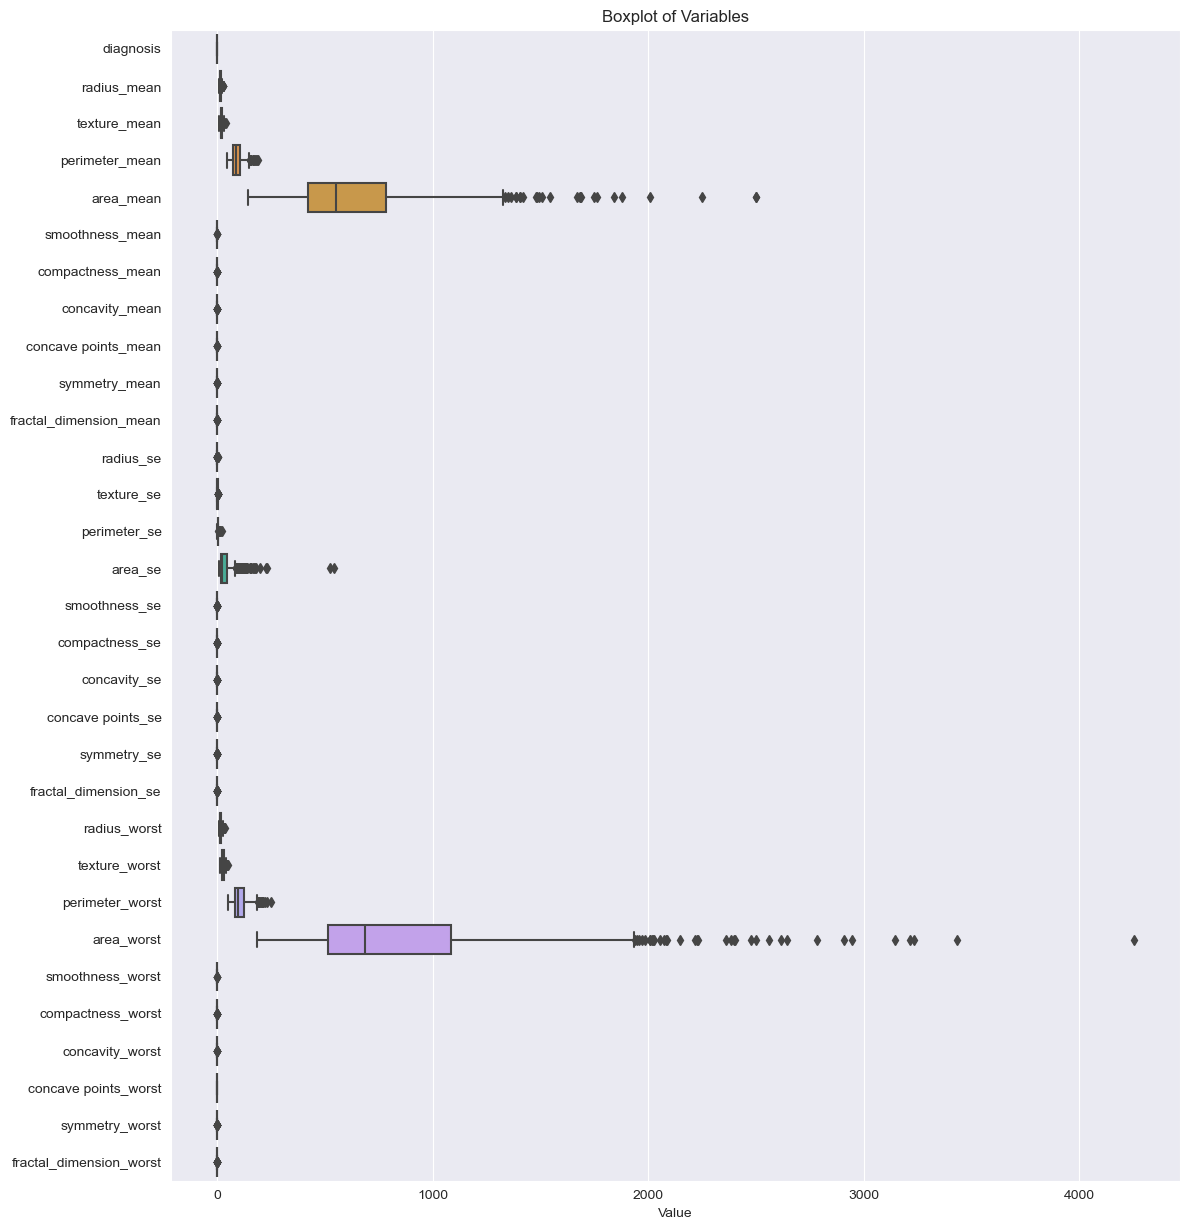

In [37]:
sns.set_style("darkgrid")

def makeBoxPlot(rawDF, column_names):
    # Melt the dataframe to long format
    meltedDF = pd.melt(rawDF[column_names], var_name='Variable', value_name='Value')
    
    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(12, len(column_names) * 0.4))
    
    # Create the boxplot
    sns.boxplot(x='Value', y='Variable', data=meltedDF, orient='h', ax=ax)
    
    # Customize the plot
    ax.set_title('Boxplot of Variables')
    ax.set_xlabel('Value')
    ax.set_ylabel('')
    plt.tight_layout()
    plt.show()

makeBoxPlot(rawDF, numeric)

In [10]:
outlierVariables = ['perimeter_mean', 'area_mean', 'area_se', 'perimeter_worst', 'area_worst']

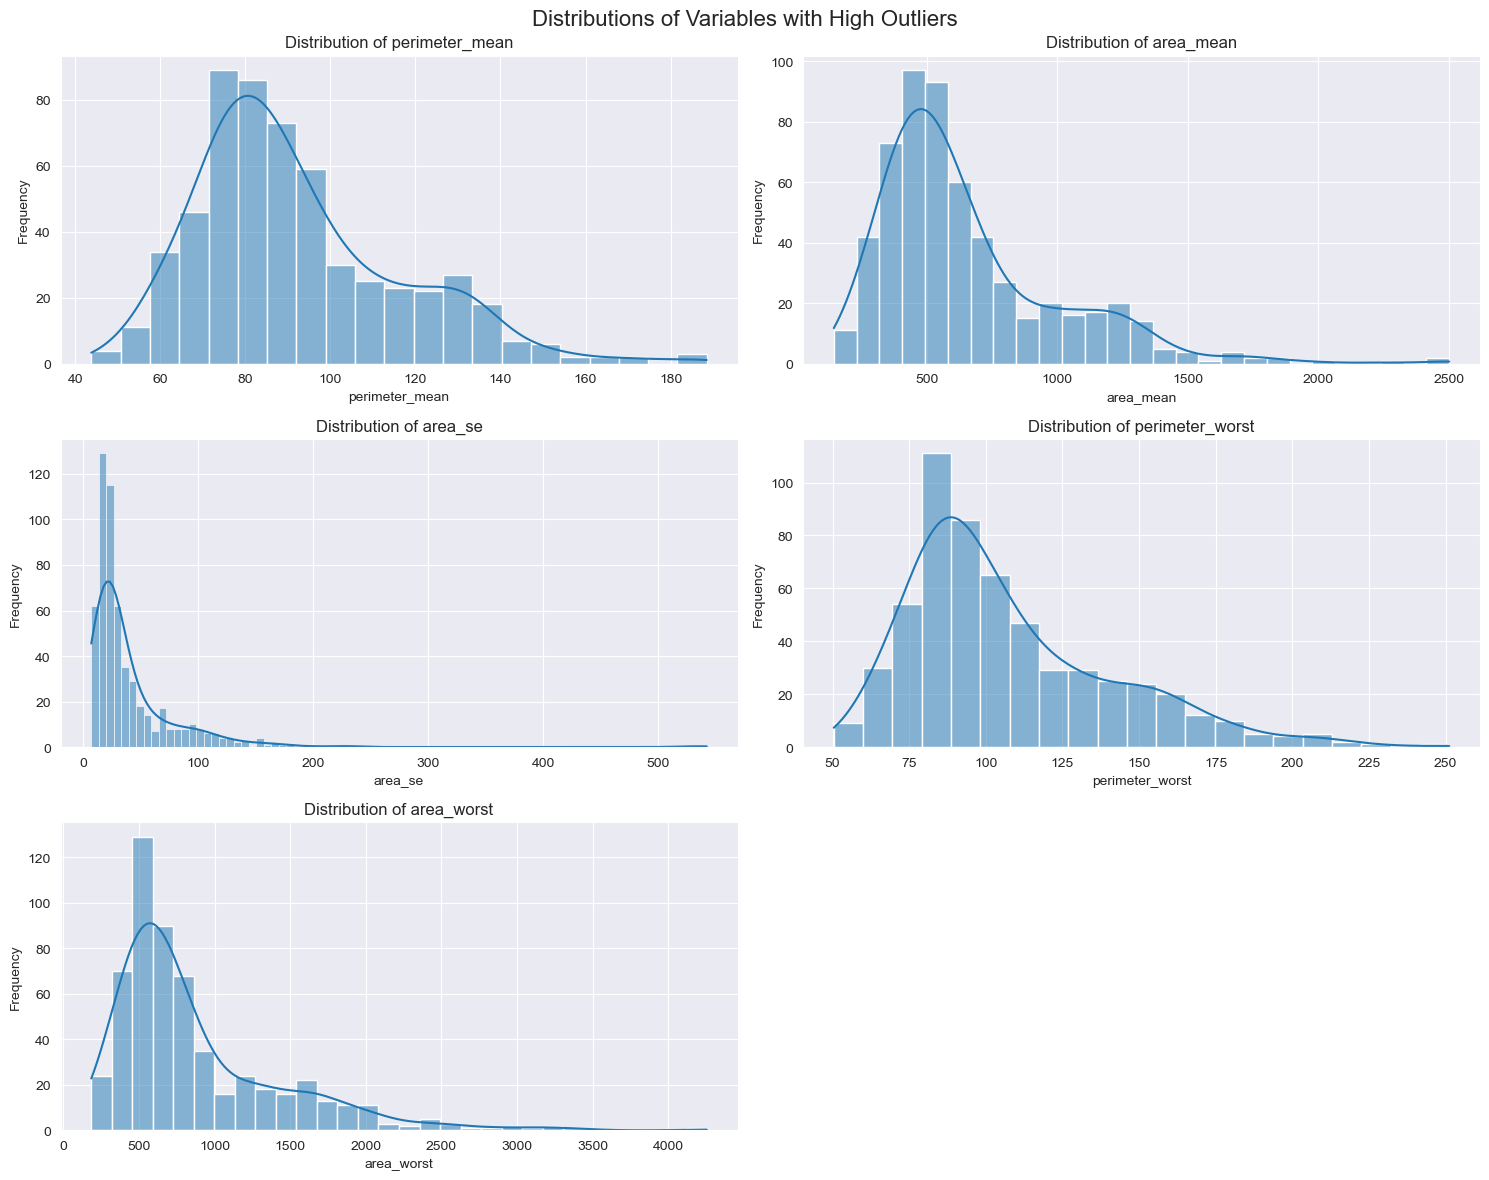

In [39]:
sns.set_style("darkgrid")

def makeDistPlot(rawDF, variables):
    # Set up the subplot grid
    n_vars = len(variables)
    fig, axes = plt.subplots(nrows=(n_vars+1)//2, ncols=2, figsize=(15, 4*((n_vars+1)//2)))
    fig.suptitle('Distributions of Variables with High Outliers', fontsize=16)
    
    # Flatten the axes array for easier indexing
    axes = axes.flatten()
    
    # Create a histogram for each variable
    for i, var in enumerate(variables):
        sns.histplot(data=rawDF, x=var, ax=axes[i], kde=True)
        axes[i].set_title(f'Distribution of {var}')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Frequency')
    
    # Remove unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Call the function
makeDistPlot(rawDF, outlierVariables)

In [13]:
# Now that we've visualized our outliers, let's do an IQR analysis on them.

import pandas as pd
import numpy as np

def iqrAnalysis(df, columns):
    results = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        iqr = Q3 - Q1
        lower = Q1 - 1.5 * iqr
        upper = Q3 + 1.5 * iqr
        
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        
        results[col] = {
            'Q1': Q1,
            'Q3': Q3,
            'IQR': iqr,
            'Lower Bound': lower,
            'Upper Bound': upper,
            'Outliers Count': len(outliers),
            'Outliers Percentage': (len(outliers) / len(df)) * 100
        }
    
    return pd.DataFrame(results).T

iqrResults = iqrAnalysis(rawDF, outlierVariables)

print(iqrResults)

# To get a summary of columns with the most outliers
summary = iqrResults.sort_values('Outliers Count', ascending=False)[['Outliers Count', 'Outliers Percentage']]
print("\nColumns with the most outliers from most to least:")
print(summary)


                     Q1       Q3     IQR  Lower Bound  Upper Bound  \
perimeter_mean    75.17   104.10   28.93       31.775      147.495   
area_mean        420.30   782.70  362.40     -123.300     1326.300   
area_se           17.85    45.19   27.34      -23.160       86.200   
perimeter_worst   84.11   125.40   41.29       22.175      187.335   
area_worst       515.30  1084.00  568.70     -337.750     1937.050   

                 Outliers Count  Outliers Percentage  
perimeter_mean             13.0             2.284710  
area_mean                  25.0             4.393673  
area_se                    65.0            11.423550  
perimeter_worst            15.0             2.636204  
area_worst                 35.0             6.151142  

Columns with the most outliers from most to least:
                 Outliers Count  Outliers Percentage
area_se                    65.0            11.423550
area_worst                 35.0             6.151142
area_mean                  25.0       